In [4]:
from memory import MemorySystem

In [4]:
import tensorflow as tf
from neural_map import NeuralMap
from simple_functions import SimpleFunctions, simpleLinearModel

model = simpleLinearModel(no_layers=3, units = 5)
    # model's weights will now have shape [3,5,5] for input and output with shape of [None, 5] each.
neural_map = NeuralMap(shape = [3,3],
                        embed_dim = [3,5,5])

simple = SimpleFunctions(model, neural_map)

for task_id, (tag, train_ds, valid_ds) in enumerate(simple.generating_function(1000)):
    print(train_ds)

Creating SOM of shape ListWrapper([3, 3]) with weight dimension ListWrapper([3, 5, 5])
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
<ShuffleDataset shapes

In [6]:

print(tf.__version__)

2.2.0


NameError: name 'NeuralMap' is not defined

In [2]:
import tensorflow as tf
from vae import VAE
from memory import MemorySystem
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
data = tf.cast(tf.reshape(x_train, (x_train.shape[0], -1)), dtype = tf.float32) / 255
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size = 1000).batch(1000)

input_shape = (784,)
latent_dim = int(input_shape[0]/8)
vae = VAE(interm_dim = int(input_shape[0]/4), 
            latent_dim = latent_dim,
            original_dim = int(input_shape[0]))
memory_system = MemorySystem(memory_shape = [3,3], embed_dim = [latent_dim], vae = vae, name = 'memory_system')
print(memory_system(data[0:100], training = True, iter = 10))

Creating SOM of shape ListWrapper([3, 3]) with weight dimension ListWrapper([98])
Build()
encoder output: (100, 98)
None


In [17]:
memory_system.vae.encoder.weights[1:-1]

[<tf.Variable 'memory_system/vae/encoder/dense/kernel:0' shape=(784, 196) dtype=float32, numpy=
 array([[ 0.0414088 ,  0.05001777,  0.00410447, ..., -0.03713183,
          0.00934186,  0.0672353 ],
        [ 0.03179713,  0.06627765, -0.07281859, ...,  0.02519511,
         -0.071422  ,  0.0276025 ],
        [-0.01594369,  0.05522292,  0.06408095, ...,  0.04191757,
         -0.06361662, -0.00199642],
        ...,
        [-0.03669943,  0.02085077, -0.04712851, ..., -0.06544299,
         -0.05551282, -0.04446397],
        [-0.01787801,  0.01330777, -0.05274595, ..., -0.00374431,
         -0.03217873,  0.03372818],
        [ 0.04325926,  0.01941744,  0.01149817, ...,  0.07179645,
          0.04948986, -0.04258668]], dtype=float32)>,
 <tf.Variable 'memory_system/vae/encoder/dense/bias:0' shape=(196,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [49]:
memory_system.vae.encoder.layers[0].get_config()['units']

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'units': 196,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': {'class_name': 'L1L2',
  'config': {'l1': 0.0, 'l2': 9.999999974752427e-07}},
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [87]:
step = 5000
steps_per_epoch = int(data.shape[0]/step)
for i in range(1000 * steps_per_epoch):
    input = data[(i%10)*5000:(i%10+1)*5000]
    with tf.GradientTape() as tape:
            x_, z =  memory_system.vae(input, training = True)
            loss = memory_system.gamma * tf.keras.losses.MeanSquaredError()(x_,input) + sum(memory_system.vae.losses)
    gradients = tape.gradient(loss, memory_system.vae.trainable_variables)
    optimizer = tf.optimizers.SGD()
    optimizer.apply_gradients(zip(gradients, memory_system.vae.trainable_variables))
    if ((i%100) == 0):
        print('loss: %f'%(loss))

loss: 0.124401
loss: 0.123668
loss: 0.123005
loss: 0.122405
loss: 0.121839
loss: 0.121311
loss: 0.120762
loss: 0.120287
loss: 0.119790
loss: 0.119398
loss: 0.118900
loss: 0.118510
loss: 0.118137
loss: 0.117685
loss: 0.117285
loss: 0.116929
loss: 0.116551
loss: 0.116200
loss: 0.115839
loss: 0.115495
loss: 0.115169
loss: 0.114789
loss: 0.114496
loss: 0.114155
loss: 0.113852
loss: 0.113527
loss: 0.113179
loss: 0.112883
loss: 0.112591
loss: 0.112287
loss: 0.111982
loss: 0.111666
loss: 0.111374
loss: 0.111079
loss: 0.110810
loss: 0.110516
loss: 0.110254
loss: 0.109997
loss: 0.109661
loss: 0.109395
loss: 0.109088
loss: 0.108843
loss: 0.108582
loss: 0.108332
loss: 0.108050
loss: 0.107766
loss: 0.107520
loss: 0.107271
loss: 0.106975
loss: 0.106720
loss: 0.106516
loss: 0.106215
loss: 0.105974
loss: 0.105704
loss: 0.105427
loss: 0.105192
loss: 0.105008
loss: 0.104704
loss: 0.104495
loss: 0.104246
loss: 0.104032
loss: 0.103773
loss: 0.103485
loss: 0.103298
loss: 0.103004
loss: 0.102799
loss: 0.10

In [96]:
memory_system.vae.weights[0]

<tf.Variable 'memory_system/vae_2/encoder/dense_10/kernel:0' shape=(784, 196) dtype=float32, numpy=
array([[ 0.03100913,  0.07796595, -0.01213887, ..., -0.00153278,
        -0.01582383,  0.01886896],
       [ 0.0769752 , -0.00757139, -0.03532232, ...,  0.00338497,
        -0.07737003,  0.03055502],
       [ 0.06137011,  0.0509133 , -0.02755243, ...,  0.01943166,
         0.07255679,  0.06044709],
       ...,
       [-0.04810477, -0.05829584, -0.05472109, ..., -0.03817692,
        -0.00648914, -0.07212387],
       [ 0.0347815 , -0.06800101,  0.01450225, ..., -0.06420001,
         0.03546738,  0.03955351],
       [-0.0590874 , -0.0191944 , -0.01354209, ..., -0.03584026,
        -0.06048377, -0.04969533]], dtype=float32)>

In [2]:
for i, (tag, train_ds, valid_ds) in enumerate(pfft.generating_function(150)):
    print(tag)

I can change!
sin
cos
tanh
abs
log
exp
y=c
affine_1
affine_2
affine_3
affine_4
affine_5


In [16]:
from neural_map import NeuralMap
import tensorflow as tf
import numpy as np
neural_map = NeuralMap(shape = [3,3], embed_dim = [3,5,5], dtype = tf.float32)

Creating SOM of shape ListWrapper([3, 3]) with weight dimension ListWrapper([3, 5, 5])


In [17]:
neural_map

In [25]:
z = tf.random.normal([2,3,5,5], mean = 0.0, stddev = 1.0, dtype= tf.float32, seed = 10, name = 'embedding_sample') # embeddings random input

U = neural_map.read(z)

In [26]:
label_map = np.chararray([3,3], itemsize = 10) # Define map of labels for each neuron in SOM

In [27]:
U

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[2, 0],
       [0, 0]], dtype=int32)>

In [28]:
types = ['cyclic','affine']

In [29]:
for i in range(U.shape[0]):
    label_map[tuple(U[i])] = types[i]

In [30]:
label_map

chararray([[b'affine', b'\x9b%\x1e\x7f', ''],
           ['', '', ''],
           [b'cyclic', '', '']], dtype='|S10')

In [7]:
shape = [3,3]

In [23]:
rows, cols = shape
import numpy as np
Matrix = np.zeros(shape, dtype = np.object)

In [24]:
Matrix[0,0] = 'sad'

In [25]:
Matrix

array([['sad', 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=object)

In [81]:
import tensorflow as tf
min_val = -100
max_val = 100
data_size = 10
x = tf.random.uniform([data_size,1], minval=min_val, maxval=max_val, dtype = tf.float32 )

In [82]:
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-23.265503 ],
       [-58.857845 ],
       [ 53.4534   ],
       [-89.66548  ],
       [ -5.5466385],
       [-87.39541  ],
       [-88.5314   ],
       [-69.88621  ],
       [ 11.746887 ],
       [-60.374046 ]], dtype=float32)>

In [88]:
a = (x - min_val)/(max_val - min_val)

In [89]:
a

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.38367248],
       [0.20571077],
       [0.767267  ],
       [0.05167259],
       [0.4722668 ],
       [0.06302296],
       [0.05734299],
       [0.15056896],
       [0.5587344 ],
       [0.19812977]], dtype=float32)>

In [73]:
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-47.37959  ],
       [  6.829384 ],
       [ -1.4457932],
       [-71.164085 ],
       [-58.175564 ],
       [ -8.359718 ],
       [-51.60196  ],
       [ 88.11133  ],
       [-34.880898 ],
       [ 19.059631 ]], dtype=float32)>

In [91]:
2 * a - 1

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.23265505],
       [-0.58857846],
       [ 0.534534  ],
       [-0.89665484],
       [-0.05546641],
       [-0.87395406],
       [-0.88531405],
       [-0.6988621 ],
       [ 0.11746883],
       [-0.60374045]], dtype=float32)>

In [68]:
tf.ones([1,4]) * tf.ones([4,1])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [55]:
b = tf.ones([10,1], dtype=tf.float32)

In [69]:
a

[<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[0.50500846],
        [0.5746994 ],
        [0.8969326 ],
        [0.21727169],
        [0.09501587],
        [0.47729015],
        [0.92111206],
        [0.25620306],
        [0.27648675],
        [0.31412232]], dtype=float32)>]

In [66]:
tf.multiply(b,3)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]], dtype=float32)>

In [36]:
tf.matmul(tf.ones([1,4]),tf.ones([4,1]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [17]:
a = tf.multiply(a, 2)

<tf.Tensor: shape=(1, 10, 1), dtype=float32, numpy=
array([[[1.0100169 ],
        [1.1493988 ],
        [1.7938652 ],
        [0.43454337],
        [0.19003174],
        [0.9545803 ],
        [1.8422241 ],
        [0.5124061 ],
        [0.5529735 ],
        [0.62824464]]], dtype=float32)>

In [18]:
tf.add(a, -1)

<tf.Tensor: shape=(1, 10, 1), dtype=float32, numpy=
array([[[-0.49499154],
        [-0.4253006 ],
        [-0.1030674 ],
        [-0.7827283 ],
        [-0.9049841 ],
        [-0.52270985],
        [-0.07888794],
        [-0.74379694],
        [-0.72351325],
        [-0.6858777 ]]], dtype=float32)>

In [1]:
from simple_functions import simpleLinearModel
import tensorflow as tf
model = simpleLinearModel(no_layers=3, units = 5)
model(tf.ones([5,1]))

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.11929905],
       [0.11929905],
       [0.11929905],
       [0.11929905],
       [0.11929905]], dtype=float32)>

In [2]:
model.layers

In [3]:
model.weights

[<tf.Variable 'simple_linear_model/hidden_0/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[-0.04738182,  0.6287184 , -0.76010203, -0.41077334,  0.26196587],
        [-0.02113843,  0.556443  , -0.10203695, -0.31859988,  0.63030875],
        [ 0.0100441 , -0.16256267, -0.5431483 ,  0.3525114 ,  0.48322666],
        [-0.5636517 ,  0.07423973,  0.68191874, -0.64753324, -0.07142174],
        [-0.37285742, -0.28038922, -0.5399573 ,  0.39294815, -0.16701448]],
       dtype=float32)>,
 <tf.Variable 'simple_linear_model/hidden_1/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.7068479 , -0.19594675,  0.55246806, -0.44654462,  0.13193673],
        [ 0.0017367 ,  0.40573   , -0.52703696,  0.4482193 ,  0.5126051 ],
        [-0.38289434, -0.26355433,  0.6119411 , -0.49972916, -0.16984212],
        [-0.70430225,  0.5438193 , -0.1307627 ,  0.03824222,  0.49218297],
        [ 0.13590378,  0.43013597, -0.0424121 , -0.5601646 ,  0.18569028]],
       dtype=float32)>,
 <tf.Variable 'simple_

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
class simpleLinearModel(tf.keras.Model):
    ''' 
    '''
    def __init__(self, 
                no_layers,
                units):
        '''
            Constrain the network to have FIXED hidden layer neurons, that are regualarized with dropout (or something like that. Haha. We'll see)
            So,
            Inputs:
                no_layers: No of hidden layers, 
                units: units in layers except input & output
        '''
        super(simpleLinearModel, self).__init__()
        self.units = units
        self.no_layers = no_layers
        self._layers = []

        #self.first = staticDense(units = self.units) # first layer to input
        #self.last  = staticDense(units = 1) # Single output regression
        for i in range(self.no_layers):
            self._layers.append(tf.keras.layers.Dense(units = self.units, use_bias = False, kernel_regularizer = tf.keras.regularizers.l2(1e-6),name = 'hidden_'+str(i)))
        self.first = tf.keras.layers.Dense(units = self.units, use_bias = False, kernel_initializer = 'ones', trainable = False, name = 'first')

        '''
        self.second = tf.keras.layers.Dense(units = self.units, use_bias = False, kernel_regularizer = tf.keras.regularizers.l2(1e-6))
        self.third = tf.keras.layers.Dense(units = self.units, use_bias = False, kernel_regularizer = tf.keras.regularizers.l2(1e-6))
        self.fourth = tf.keras.layers.Dense(units = self.units, use_bias = False, kernel_regularizer = tf.keras.regularizers.l2(1e-6))
        '''
        self.last = tf.keras.layers.Dense(units = 1, use_bias = False, kernel_initializer = 'ones', trainable = False, name ='last')

    def call(self, inputs, inference = None):
        '''
        '''
        if(inference):
            # No dropout on inference
            x = self.first(inputs)
            for i in range(self.no_layers):
                x = self._layers[i](x)
            return self.last(x)
        else:
            x = self.first(inputs)
            #print(x)
            for i in range(self.no_layers):
                x = self._layers[i](x)
                x = tf.keras.layers.Dropout(rate = 0.3)(x)
            return self.last(x)
            '''x = self.second(x)
            x = tf.keras.layers.Dropout(rate = 0.3)(x)
            x = self.third(x)
            x = tf.keras.layers.Dropout(rate = 0.3)(x)
            x = self.fourth(x)
            x = tf.keras.layers.Dropout(rate = 0.3)(x)
            return self.last(x)'''
    
    def get_weights_tensor(self):

        return tf.convert_to_tensor(self.trainable_weights) # Not principled. But since no bias, this should work.

In [6]:
model = simpleLinearModel(no_layers=3, units = 5)

model(tf.ones([10,1]))


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305],
       [0.9992305]], dtype=float32)>

In [7]:
model.layers


In [8]:
model.summary()

Model: "simple_linear_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_0 (Dense)             multiple                  25        
_________________________________________________________________
hidden_1 (Dense)             multiple                  25        
_________________________________________________________________
hidden_2 (Dense)             multiple                  25        
_________________________________________________________________
first (Dense)                multiple                  5         
_________________________________________________________________
last (Dense)                 multiple                  5         
Total params: 85
Trainable params: 75
Non-trainable params: 10
_________________________________________________________________


In [9]:
model.trainable_weights

[<tf.Variable 'simple_linear_model_1/hidden_0/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[-0.2701944 ,  0.72431767, -0.34694448, -0.20487446,  0.21732491],
        [-0.24056393,  0.28066826, -0.27616894,  0.54228306, -0.2497254 ],
        [-0.36997646, -0.65954214,  0.3151375 , -0.3972418 ,  0.20574206],
        [-0.20811135,  0.77380955,  0.01158172,  0.23972368,  0.43912363],
        [-0.1142534 ,  0.3876276 ,  0.64407825, -0.66414857,  0.39405596]],
       dtype=float32)>,
 <tf.Variable 'simple_linear_model_1/hidden_1/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.3743074 ,  0.4895866 ,  0.44152153, -0.22642308, -0.03995013],
        [ 0.7561828 , -0.71910346, -0.18145782,  0.01556581, -0.6673912 ],
        [ 0.74802005,  0.22328132,  0.36352634,  0.19032979, -0.28401592],
        [-0.12819475, -0.67937255, -0.31565002,  0.00106543,  0.04714543],
        [-0.3096057 ,  0.34876   , -0.10816973,  0.6005585 , -0.11634856]],
       dtype=float32)>,
 <tf.Variable 'sim

In [10]:
print(model.variables)

[<tf.Variable 'simple_linear_model_1/hidden_0/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.2701944 ,  0.72431767, -0.34694448, -0.20487446,  0.21732491],
       [-0.24056393,  0.28066826, -0.27616894,  0.54228306, -0.2497254 ],
       [-0.36997646, -0.65954214,  0.3151375 , -0.3972418 ,  0.20574206],
       [-0.20811135,  0.77380955,  0.01158172,  0.23972368,  0.43912363],
       [-0.1142534 ,  0.3876276 ,  0.64407825, -0.66414857,  0.39405596]],
      dtype=float32)>, <tf.Variable 'simple_linear_model_1/hidden_1/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[ 0.3743074 ,  0.4895866 ,  0.44152153, -0.22642308, -0.03995013],
       [ 0.7561828 , -0.71910346, -0.18145782,  0.01556581, -0.6673912 ],
       [ 0.74802005,  0.22328132,  0.36352634,  0.19032979, -0.28401592],
       [-0.12819475, -0.67937255, -0.31565002,  0.00106543,  0.04714543],
       [-0.3096057 ,  0.34876   , -0.10816973,  0.6005585 , -0.11634856]],
      dtype=float32)>, <tf.Variable 'simple_linear_mod

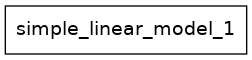

In [18]:
tf.keras.utils.plot_model(model, show_layer_names= True, show_shapes= True, expand_nested = True)

In [71]:
class testModel(tf.keras.Model):
    def __init__(self):
        super(testModel, self).__init__()
        self.l4 = tf.keras.layers.Dense(units = 1, use_bias = False, kernel_initializer='ones', name = '4')
        self.l3 = tf.keras.layers.Dense(units = 2, use_bias = False, kernel_initializer='ones', name = '3')
        self.l2 = tf.keras.layers.Dense(units = 10, use_bias = False, kernel_initializer='ones', name = '2')
        self.l1 = tf.keras.layers.Dense(units = 5, use_bias = False, kernel_initializer='ones', name = '1')
    
    def call(self, inputs):
        x = self.l1(inputs)
        x = self.l2(x)
        x = self.l3(x)
        return self.l4(x)

In [72]:
test = testModel()
test(tf.ones([10,1]))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.]], dtype=float32)>

In [73]:
test.summary()

Model: "test_model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
4 (Dense)                    multiple                  2         
_________________________________________________________________
3 (Dense)                    multiple                  20        
_________________________________________________________________
2 (Dense)                    multiple                  50        
_________________________________________________________________
1 (Dense)                    multiple                  5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.]], dtype=float32)>

In [1]:
import tensorflow_datasets as tfds

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'ai2_arc',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist

In [35]:
import tensorflow as tf
import collections
import numpy as np
from neural_map import NeuralMap
import time

In [44]:
def gen_stream(Z):
    '''Stream of samples, batched out from encoded/input samples Z
    '''
    train_ds = tf.data.Dataset.from_tensor_slices(Z).batch(1000).shuffle(buffer_size=3 * 1000)
    return train_ds

In [45]:

neural_map = NeuralMap(shape=[30, 30], embed_dim=[784], dtype=tf.float32)
iterations = 100
batch_size = 1000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = tf.reshape(x_train, [x_train.shape[0], -1])
x_train = tf.cast(x_train, dtype=tf.float32)


Creating SOM of shape ListWrapper([30, 30]) with weight dimension ListWrapper([784])


In [47]:
for Z in enumerate(gen_stream(x_train)):
    print(Z[1])

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(1000, 784), dtype=float32)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(1000, 784), dtype=float32)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(1000, 784), dtype=float32)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(1000, 784), dtype=float32)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(1000, 784), dtype

In [3]:
times

NameError: name 'times' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lens, times)
plt.show()

In [36]:
save_lens = lens
save_times = times

In [12]:
import tensorflow as tf


In [16]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = tf.reshape(x_train, [x_train.shape[0],-1])

In [19]:
tf.cast(x_train, dtype = tf.float32)

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [1]:
import cProfile
import re
import pstats
from pstats import SortKey
p = pstats.Stats('restats')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 03:59:59 2020    restats

         57951877 function calls (57010502 primitive calls) in 161.738 seconds

   Ordered by: standard name
   List reduced from 1927 to 18 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.002    0.000    0.024    0.000 neural_map.py:110(eta)
      196    0.003    0.000    0.031    0.000 neural_map.py:113(sigma)
      196    0.010    0.000    0.654    0.003 neural_map.py:116(H)
      196    0.017    0.000   51.824    0.264 neural_map.py:128(best_match_neuron)
      392    0.009    0.000   21.790    0.056 neural_map.py:159(nd_norm)
      196    0.017    0.000   86.978    0.444 neural_map.py:168(call)
      196    0.045    0.000   65.805    0.336 neural_map.py:203(compute_gradient)
      196    0.012    0.000   17.081    0.087 neural_map.py:239(density_q)
      196    0.005    0.000    0.226    0.001 neural_map.py:257(density_p)
      196    0.006    0.000    0.187

&lt;pstats.Stats at 0x7feb98b4b110&gt;

In [2]:
p = pstats.Stats('restats_opt')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 06:33:36 2020    restats_opt

         57995977 function calls (57054210 primitive calls) in 116.588 seconds

   Ordered by: standard name
   List reduced from 1929 to 18 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.001    0.000    0.017    0.000 neural_map.py:110(eta)
      196    0.002    0.000    0.021    0.000 neural_map.py:113(sigma)
      196    0.007    0.000    0.304    0.002 neural_map.py:116(H)
      196    0.015    0.000   38.384    0.196 neural_map.py:128(best_match_neuron)
      392    0.011    0.000   18.467    0.047 neural_map.py:164(nd_norm)
      196    0.012    0.000   67.606    0.345 neural_map.py:183(call)
      196    0.035    0.000   50.170    0.256 neural_map.py:218(compute_gradient)
      196    0.010    0.000   14.488    0.074 neural_map.py:254(density_q)
      196    0.003    0.000    0.119    0.001 neural_map.py:272(density_p)
      196    0.004    0.000    0

&lt;pstats.Stats at 0x7f98001819d0&gt;

In [3]:
p = pstats.Stats('restats_opt_q')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 06:41:49 2020    restats_opt_q

         18341543 function calls (18276494 primitive calls) in 69.537 seconds

   Ordered by: standard name
   List reduced from 1086 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.001    0.000    0.017    0.000 neural_map.py:110(eta)
      196    0.002    0.000    0.021    0.000 neural_map.py:113(sigma)
      196    0.007    0.000    0.310    0.002 neural_map.py:116(H)
      196    0.015    0.000   37.759    0.193 neural_map.py:128(best_match_neuron)
      392    0.012    0.000   17.889    0.046 neural_map.py:164(nd_norm)
      196    0.012    0.000   65.680    0.335 neural_map.py:183(call)
      196    0.038    0.000   49.183    0.251 neural_map.py:218(compute_gradient)
      196    0.013    0.000   13.582    0.069 neural_map.py:255(density_q)
      196    0.003    0.000    0.124    0.001 neural_map.py:264(density_p)
      196    0.004    0.000    

&lt;pstats.Stats at 0x7f9800181190&gt;

In [4]:
p = pstats.Stats('restats_opt_savecomp')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 07:08:07 2020    restats_opt_savecomp

         57965841 function calls (57023482 primitive calls) in 110.957 seconds

   Ordered by: standard name
   List reduced from 1929 to 18 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.001    0.000    0.017    0.000 neural_map.py:113(eta)
      196    0.002    0.000    0.021    0.000 neural_map.py:116(sigma)
      196    0.007    0.000    0.321    0.002 neural_map.py:119(H)
      196    0.016    0.000   38.515    0.197 neural_map.py:131(best_match_neuron)
      392    0.011    0.000   17.468    0.045 neural_map.py:164(nd_norm)
      196    0.011    0.000   62.171    0.317 neural_map.py:183(call)
      196    0.019    0.000   45.678    0.233 neural_map.py:218(compute_gradient)
      196    0.012    0.000   13.548    0.069 neural_map.py:249(density_q)
      196    0.004    0.000    0.126    0.001 neural_map.py:258(density_p)
      196    0.004    0

&lt;pstats.Stats at 0x7f97f2e97690&gt;

In [5]:
p = pstats.Stats('restats_opt_savecomp_ndindex')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 08:18:27 2020    restats_opt_savecomp_ndindex

         40667693 function calls (39774436 primitive calls) in 84.633 seconds

   Ordered by: standard name
   List reduced from 1920 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.001    0.000    0.018    0.000 neural_map.py:113(eta)
      196    0.002    0.000    0.021    0.000 neural_map.py:116(sigma)
      196    0.007    0.000    0.296    0.002 neural_map.py:119(H)
      196    0.015    0.000   13.366    0.068 neural_map.py:131(best_match_neuron)
      392    0.010    0.000   17.290    0.044 neural_map.py:164(nd_norm)
      196    0.011    0.000   36.593    0.187 neural_map.py:183(call)
      196    0.019    0.000   20.383    0.104 neural_map.py:218(compute_gradient)
      196    0.012    0.000   13.251    0.068 neural_map.py:249(density_q)
      196    0.003    0.000    0.123    0.001 neural_map.py:258(density_p)
      196    0.0

&lt;pstats.Stats at 0x7f97f2e53950&gt;

In [6]:
p = pstats.Stats('restats_final')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 08:49:30 2020    restats_final

         918591 function calls (903228 primitive calls) in 25.225 seconds

   Ordered by: standard name
   List reduced from 1077 to 16 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.001    0.000    0.018    0.000 neural_map.py:113(eta)
      196    0.002    0.000    0.021    0.000 neural_map.py:116(sigma)
      196    0.007    0.000    0.325    0.002 neural_map.py:119(H)
      196    0.017    0.000    6.484    0.033 neural_map.py:131(best_match_neuron)
      392    0.006    0.000    4.319    0.011 neural_map.py:164(nd_norm)
      196    0.010    0.000   21.784    0.111 neural_map.py:186(call)
      196    0.019    0.000   12.878    0.066 neural_map.py:221(compute_gradient)
      196    0.015    0.000    6.212    0.032 neural_map.py:252(density_q)
      196    0.004    0.000    0.127    0.001 neural_map.py:261(density_p)
      196    0.004    0.000    0.10

&lt;pstats.Stats at 0x7f97f29e56d0&gt;

In [7]:
p = pstats.Stats('restats_final_noassert')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 09:36:59 2020    restats_final_noassert

         918674 function calls (903308 primitive calls) in 25.053 seconds

   Ordered by: standard name
   List reduced from 1089 to 16 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.002    0.000    0.019    0.000 neural_map.py:113(eta)
      196    0.002    0.000    0.022    0.000 neural_map.py:116(sigma)
      196    0.007    0.000    0.325    0.002 neural_map.py:119(H)
      196    0.017    0.000    6.394    0.033 neural_map.py:132(best_match_neuron)
      196    0.011    0.000   21.697    0.111 neural_map.py:166(call)
      196    0.019    0.000   12.795    0.065 neural_map.py:202(compute_gradient)
      196    0.014    0.000    6.254    0.032 neural_map.py:232(density_q)
      196    0.004    0.000    0.125    0.001 neural_map.py:241(density_p)
      196    0.004    0.000    0.104    0.001 neural_map.py:253(kl_divergence)
      196    0.002  

&lt;pstats.Stats at 0x7f97f25f6310&gt;

In [8]:
p = pstats.Stats('restats_final_noassert')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Tue Sep 22 09:36:59 2020    restats_final_noassert

         918674 function calls (903308 primitive calls) in 25.053 seconds

   Ordered by: standard name
   List reduced from 1089 to 16 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      196    0.002    0.000    0.019    0.000 neural_map.py:113(eta)
      196    0.002    0.000    0.022    0.000 neural_map.py:116(sigma)
      196    0.007    0.000    0.325    0.002 neural_map.py:119(H)
      196    0.017    0.000    6.394    0.033 neural_map.py:132(best_match_neuron)
      196    0.011    0.000   21.697    0.111 neural_map.py:166(call)
      196    0.019    0.000   12.795    0.065 neural_map.py:202(compute_gradient)
      196    0.014    0.000    6.254    0.032 neural_map.py:232(density_q)
      196    0.004    0.000    0.125    0.001 neural_map.py:241(density_p)
      196    0.004    0.000    0.104    0.001 neural_map.py:253(kl_divergence)
      196    0.002  

&lt;pstats.Stats at 0x7f97f2401f90&gt;

In [9]:
p = pstats.Stats('stats')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Fri Sep 25 07:08:26 2020    stats

         162572824 function calls (160073204 primitive calls) in 2084.830 seconds

   Ordered by: standard name
   List reduced from 2030 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    23976    0.206    0.000    3.186    0.000 neural_map.py:113(eta)
    23976    0.175    0.000    3.738    0.000 neural_map.py:116(sigma)
    23976    0.663    0.000   21.301    0.001 neural_map.py:119(H)
    23976    1.222    0.000  543.636    0.023 neural_map.py:132(best_match_neuron)
    23976    0.541    0.000  636.535    0.027 neural_map.py:166(call)
    23976    1.649    0.000  599.069    0.025 neural_map.py:202(compute_gradient)
    23976    0.754    0.000   17.756    0.001 neural_map.py:232(density_q)
    23976    0.359    0.000    6.077    0.000 neural_map.py:241(density_p)
    23976    0.320    0.000    4.200    0.000 neural_map.py:253(kl_divergence)
    23976    0.140    0.000  

&lt;pstats.Stats at 0x7f97f2470cd0&gt;

In [10]:
p = pstats.Stats('stats')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Fri Sep 25 07:08:26 2020    stats

         162572824 function calls (160073204 primitive calls) in 2084.830 seconds

   Ordered by: standard name
   List reduced from 2030 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    23976    0.206    0.000    3.186    0.000 neural_map.py:113(eta)
    23976    0.175    0.000    3.738    0.000 neural_map.py:116(sigma)
    23976    0.663    0.000   21.301    0.001 neural_map.py:119(H)
    23976    1.222    0.000  543.636    0.023 neural_map.py:132(best_match_neuron)
    23976    0.541    0.000  636.535    0.027 neural_map.py:166(call)
    23976    1.649    0.000  599.069    0.025 neural_map.py:202(compute_gradient)
    23976    0.754    0.000   17.756    0.001 neural_map.py:232(density_q)
    23976    0.359    0.000    6.077    0.000 neural_map.py:241(density_p)
    23976    0.320    0.000    4.200    0.000 neural_map.py:253(kl_divergence)
    23976    0.140    0.000  

&lt;pstats.Stats at 0x7f97f2495c50&gt;

In [11]:
p = pstats.Stats('stats_optim')
p.strip_dirs().sort_stats(-1).print_stats('cast')

Sun Sep 27 06:51:12 2020    stats_optim

         44335615 function calls (43694228 primitive calls) in 940.046 seconds

   Ordered by: standard name
   List reduced from 1075 to 8 due to restriction &lt;&#39;cast&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    11198    0.108    0.000    0.600    0.000 base_layer.py:2025(_maybe_cast_inputs)
    11198    0.048    0.000    0.203    0.000 base_layer_utils.py:471(autocast_context_manager)
    33595    0.111    0.000  810.480    0.024 gen_math_ops.py:1944(cast)
    67187    0.972    0.000  812.790    0.012 math_ops.py:732(cast)
    11198    0.012    0.000    0.020    0.000 ops.py:4959(_auto_cast_variable_read_dtype)
    22396    0.028    0.000    0.046    0.000 ops.py:4974(_auto_cast_variable_read_dtype)
    22396    0.038    0.000    0.104    0.000 ops.py:4980(_enable_auto_casting_variables)
        5    0.000    0.000    0.000    0.000 policy.py:434(should_cast_variables)




&lt;pstats.Stats at 0x7f97f21822d0&gt;

In [12]:
p = pstats.Stats('stats_optim')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Sun Sep 27 06:51:12 2020    stats_optim

         44335615 function calls (43694228 primitive calls) in 940.046 seconds

   Ordered by: standard name
   List reduced from 1075 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    11198    0.118    0.000    1.826    0.000 neural_map.py:116(eta)
    11198    0.126    0.000   21.569    0.002 neural_map.py:119(sigma)
    11198    0.408    0.000   32.374    0.003 neural_map.py:122(H)
    11198    0.425    0.000   13.657    0.001 neural_map.py:135(best_match_neuron)
    11198    0.175    0.000   76.734    0.007 neural_map.py:167(call)
    11198    0.432    0.000   57.625    0.005 neural_map.py:204(compute_gradient)
    11198    0.077    0.000    1.142    0.000 neural_map.py:245(mat_muls)
    11198    0.417    0.000    9.667    0.001 neural_map.py:248(density_q)
    11198    0.193    0.000    3.233    0.000 neural_map.py:257(density_p)
    11198    0.183    0.000    

&lt;pstats.Stats at 0x7f97f20f4ed0&gt;

In [13]:
p = pstats.Stats('stats_optim')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Sun Sep 27 06:51:12 2020    stats_optim

         44335615 function calls (43694228 primitive calls) in 940.046 seconds

   Ordered by: standard name
   List reduced from 1075 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    11198    0.118    0.000    1.826    0.000 neural_map.py:116(eta)
    11198    0.126    0.000   21.569    0.002 neural_map.py:119(sigma)
    11198    0.408    0.000   32.374    0.003 neural_map.py:122(H)
    11198    0.425    0.000   13.657    0.001 neural_map.py:135(best_match_neuron)
    11198    0.175    0.000   76.734    0.007 neural_map.py:167(call)
    11198    0.432    0.000   57.625    0.005 neural_map.py:204(compute_gradient)
    11198    0.077    0.000    1.142    0.000 neural_map.py:245(mat_muls)
    11198    0.417    0.000    9.667    0.001 neural_map.py:248(density_q)
    11198    0.193    0.000    3.233    0.000 neural_map.py:257(density_p)
    11198    0.183    0.000    

&lt;pstats.Stats at 0x7f97f2a018d0&gt;

In [14]:
p = pstats.Stats('stats_optim')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')


Sun Sep 27 06:51:12 2020    stats_optim

         44335615 function calls (43694228 primitive calls) in 940.046 seconds

   Ordered by: standard name
   List reduced from 1075 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    11198    0.118    0.000    1.826    0.000 neural_map.py:116(eta)
    11198    0.126    0.000   21.569    0.002 neural_map.py:119(sigma)
    11198    0.408    0.000   32.374    0.003 neural_map.py:122(H)
    11198    0.425    0.000   13.657    0.001 neural_map.py:135(best_match_neuron)
    11198    0.175    0.000   76.734    0.007 neural_map.py:167(call)
    11198    0.432    0.000   57.625    0.005 neural_map.py:204(compute_gradient)
    11198    0.077    0.000    1.142    0.000 neural_map.py:245(mat_muls)
    11198    0.417    0.000    9.667    0.001 neural_map.py:248(density_q)
    11198    0.193    0.000    3.233    0.000 neural_map.py:257(density_p)
    11198    0.183    0.000    

&lt;pstats.Stats at 0x7f97f19e5b50&gt;

In [118]:
p = pstats.Stats('stats_optim_1')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')


Sun Sep 27 07:40:13 2020    stats_optim_1

         149769569 function calls (147413899 primitive calls) in 2034.427 seconds

   Ordered by: standard name
   List reduced from 2030 to 18 due to restriction <'neural_map'>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    23976    0.243    0.000    3.850    0.000 neural_map.py:116(eta)
    23976    0.222    0.000   23.409    0.001 neural_map.py:119(sigma)
    23976    0.847    0.000   45.834    0.002 neural_map.py:122(H)
    23976    0.932    0.000   28.690    0.001 neural_map.py:135(best_match_neuron)
    23976    0.370    0.000  138.915    0.006 neural_map.py:167(call)
    23976    0.980    0.000   98.964    0.004 neural_map.py:204(compute_gradient)
    23976    0.146    0.000    2.358    0.000 neural_map.py:245(mat_muls)
    23976    0.889    0.000   20.234    0.001 neural_map.py:248(density_q)
    23976    0.384    0.000    6.824    0.000 neural_map.py:257(density_p)
    23976    0.352    0.000    4.711    

In [8]:
p = pstats.Stats('stats_optim_2')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Wed Oct  7 02:11:26 2020    stats_optim_2

         24439974 function calls (24226548 primitive calls) in 57.255 seconds

   Ordered by: standard name
   List reduced from 1126 to 17 due to restriction &lt;&#39;neural_map&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    12359    0.135    0.000    2.229    0.000 neural_map.py:116(eta)
    12359    0.131    0.000    2.238    0.000 neural_map.py:120(sigma)
    12359    0.252    0.000    8.699    0.001 neural_map.py:124(H)
    12359    0.443    0.000   12.738    0.001 neural_map.py:147(_best_match_neuron)
       13    0.220    0.017   49.638    3.818 neural_map.py:203(call)
    12359    0.498    0.000   33.983    0.003 neural_map.py:246(compute_gradient)
       12    0.000    0.000    0.009    0.001 neural_map.py:294(density_q)
       12    0.000    0.000    0.002    0.000 neural_map.py:304(density_p)
       12    0.000    0.000    0.002    0.000 neural_map.py:317(kl_divergence)
       12    0.000    0.

&lt;pstats.Stats at 0x7feb987ebb90&gt;

In [12]:
p = pstats.Stats('stats_optim_3')
p.strip_dirs().sort_stats(-1).print_stats('tf__')

Wed Oct  7 02:13:52 2020    stats_optim_3

         5530180 function calls (5002195 primitive calls) in 53.189 seconds

   Ordered by: standard name
   List reduced from 2287 to 13 due to restriction &lt;&#39;tf__&#39;&gt;

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.212    0.212 tmp2zeyq8bp.py:6(tf___best_match_neuron)
        1    0.000    0.000    0.003    0.003 tmp4_oqtnjc.py:6(tf__kl_divergence)
        1    0.000    0.000    0.003    0.003 tmp5d5wt0az.py:6(tf__update_memory)
        1    0.000    0.000    1.744    1.744 tmp7y8lmu6f.py:6(tf__call)
        2    0.000    0.000    0.003    0.001 tmp8t6pae2i.py:6(tf__nd_norm)
        1    0.000    0.000    0.003    0.003 tmpa40ui5pa.py:6(tf__eta)
        1    0.000    0.000    0.012    0.012 tmpe4qvpfqv.py:6(tf__density_q)
        1    0.000    0.000    0.004    0.004 tmpi7zuuf1m.py:6(tf__density_p)
        1    0.000    0.000    0.087    0.087 tmpjlajdi6c.py:6(tf__H)
      

&lt;pstats.Stats at 0x7feb833c2d50&gt;

In [136]:
@tf.function
def func(a):
    print('Tracing with ', a)
    return a + a

def func1(a):
    print('Tracing with ', a)
    return a + a

In [137]:
print(double.pretty_printed_concrete_signatures())

NameError: name 'double' is not defined

In [138]:
print(func(tf.constant(1)))

Tracing with  Tensor("a:0", shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [139]:
print(func(tf.constant(1.0)))

Tracing with  Tensor("a:0", shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [140]:
func

In [141]:
func1

<function __main__.func1(a)>

In [135]:
print(func(tf.constant('1')))

tf.Tensor(b'11', shape=(), dtype=string)


In [17]:
import tensorflow as tf

In [81]:
x = tf.ones([1000], dtype = tf.int64)
y = tf.ones([1000], dtype = tf.int64) * 3


In [83]:
x_ = tf.cast(x, dtype = tf.float32)
y_ = tf.cast(y, dtype = tf.float32)

In [88]:
(x_ - y_)/ tf.math.exp(2.0)

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067056, -0.27067056, -0.27067056, -0.27067056, -0.27067056,
       -0.27067

In [82]:
x - y

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2

In [71]:
%timeit tf.math.exp(-1000/1500)

6.54 µs ± 83.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [76]:
%timeit tf.math.exp(-1000/1500)

6.59 µs ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [77]:
%timeit tf.math.exp(-1000.00/1500.00)

6.59 µs ± 32.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [75]:
%timeit tf.math.exp(tf.constant(-1000)/1500)

76.9 µs ± 466 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
%timeit tf.ones([100,20,20,1], dtype = tf.int64) - tf.ones([1000], dtype = tf.int64)

10.1 ms ± 97.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%timeit tf.cast(tf.ones([100,20,20,1], dtype = tf.int64), dtype = tf.float32)


208 µs ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%timeit tf.cast(tf.ones([1000], dtype = tf.int64), dtype = tf.float32)

75.1 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [48]:
x = tf.cast(tf.ones([100,20,20,1], dtype = tf.int64), dtype = tf.float32)
y = tf.cast(tf.ones([1000], dtype = tf.int64), dtype = tf.float32)

In [49]:
%timeit x - y

4.51 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
%timeit tf.cast(tf.ones([100,20,20,1], dtype = tf.int64) - tf.ones([1000], dtype = tf.int64), dtype = tf.float32)

18.2 ms ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
%timeit tf.cast(tf.ones([100,20,20,1], dtype = tf.int64), dtype = tf.float32) - tf.cast(tf.ones([1000], dtype = tf.int64), dtype = tf.float32)

5.04 ms ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%timeit tf.ones([100,20,20,1], dtype = tf.float16) - tf.ones([1000], dtype = tf.float16)

8.74 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [120]:
p = pstats.Stats('stats_optim_1')
p.strip_dirs().sort_stats(-1).print_stats('neural_map')

Sun Sep 27 07:40:13 2020    stats_optim_1

         149769569 function calls (147413899 primitive calls) in 2034.427 seconds

   Ordered by: standard name
   List reduced from 2030 to 18 due to restriction <'neural_map'>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    23976    0.243    0.000    3.850    0.000 neural_map.py:116(eta)
    23976    0.222    0.000   23.409    0.001 neural_map.py:119(sigma)
    23976    0.847    0.000   45.834    0.002 neural_map.py:122(H)
    23976    0.932    0.000   28.690    0.001 neural_map.py:135(best_match_neuron)
    23976    0.370    0.000  138.915    0.006 neural_map.py:167(call)
    23976    0.980    0.000   98.964    0.004 neural_map.py:204(compute_gradient)
    23976    0.146    0.000    2.358    0.000 neural_map.py:245(mat_muls)
    23976    0.889    0.000   20.234    0.001 neural_map.py:248(density_q)
    23976    0.384    0.000    6.824    0.000 neural_map.py:257(density_p)
    23976    0.352    0.000    4.711    

In [119]:
p = pstats.Stats('stats_optim_1')
p.strip_dirs().sort_stats('cumulative').print_stats(30)

Sun Sep 27 07:40:13 2020    stats_optim_1

         149769569 function calls (147413899 primitive calls) in 2034.427 seconds

   Ordered by: cumulative time
   List reduced from 2030 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     10/1    0.000    0.000 2034.446 2034.446 {built-in method builtins.exec}
        1    0.001    0.001 2034.446 2034.446 <string>:1(<module>)
        1    0.638    0.638 2034.444 2034.444 neural_map.py:371(run)
  1561502 1838.130    0.001 1838.130    0.001 {built-in method tensorflow.python._pywrap_tfe.TFE_Py_FastPathExecute}
748753/724777    1.468    0.000 1835.158    0.003 dispatch.py:177(wrapper)
    47952    0.345    0.000 1823.863    0.038 metrics.py:174(__call__)
    47952    0.240    0.000 1823.379    0.038 distributed_training_utils.py:1105(call_replica_local_fn)
    47952    0.470    0.000 1822.260    0.038 metrics.py:186(replica_local_fn)
    47952    1.059    0.000 1801.589    0.038 metrics_

In [29]:
%timeit tf.ones([100,1,1,784], dtype = tf.float32) * tf.ones([20,20,1], dtype = tf.float32)

3.34 ms ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit tf.cast(tf.ones([100,20,20,784], dtype = tf.int32), dtype = tf.float32)

8.97 ms ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
import tensorflow as tf
import numpy as np

In [18]:
tf.math.exp(a)

NotFoundError: Could not find valid device for node.
Node:{{node Exp}}
All kernels registered for op Exp :
  device='XLA_CPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_FLOAT]
 [Op:Exp]

In [72]:
from functools import wraps
import time
def log_time(f):
    @wraps(f)
    def wrapped_function(*args, **kwargs):
        start_time = time.time()
        val = f(*args, **kwargs)
        elapsed = (time.time() - start_time)
        print("--- {}: {} seconds ---".format(f.__name__, elapsed))
        return val
    return wrapped_function

@log_time
def nd_norm_optimized(diff):
    ''' Flatten the last embed_dim dimensions and then taken regular tf.norm
    '''
    flat = tf.reshape(diff, list(diff.shape[:(len(diff.shape) - len(embed_dim))]) + [-1])
    return tf.norm(flat, axis = -1)
    
@log_time
def nd_norm(diff):
    for _ in range(1, len(embed_dim) + 1):
        diff = tf.norm(diff, axis=-1)
    return diff
@log_time
def nd_norm_final(diff):
    axes = np.arange(start = -1, stop = -1 * len(embed_dim) - 1, step = -1)
    return tf.math.reduce_euclidean_norm(diff, axis = axes)

In [115]:
%timeit nd_norm(a)

53711 seconds ---
--- nd_norm: 0.0009543895721435547 seconds ---
--- nd_norm: 0.0010912418365478516 seconds ---
--- nd_norm: 0.001650094985961914 seconds ---
--- nd_norm: 0.0013980865478515625 seconds ---
--- nd_norm: 0.001371622085571289 seconds ---
--- nd_norm: 0.0013494491577148438 seconds ---
--- nd_norm: 0.001123189926147461 seconds ---
--- nd_norm: 0.0010266304016113281 seconds ---
--- nd_norm: 0.0010025501251220703 seconds ---
--- nd_norm: 0.0010523796081542969 seconds ---
--- nd_norm: 0.0010540485382080078 seconds ---
--- nd_norm: 0.0010471343994140625 seconds ---
--- nd_norm: 0.0010559558868408203 seconds ---
--- nd_norm: 0.0010373592376708984 seconds ---
--- nd_norm: 0.0009489059448242188 seconds ---
--- nd_norm: 0.0010175704956054688 seconds ---
--- nd_norm: 0.001001596450805664 seconds ---
--- nd_norm: 0.0009763240814208984 seconds ---
--- nd_norm: 0.0009729862213134766 seconds ---
--- nd_norm: 0.001066446304321289 seconds ---
--- nd_norm: 0.001001596450805664 seconds ---
-

In [113]:
%timeit nd_norm_final(a)

---
--- nd_norm_final: 0.0001666545867919922 seconds ---
--- nd_norm_final: 0.0001666545867919922 seconds ---
--- nd_norm_final: 0.0001766681671142578 seconds ---
--- nd_norm_final: 0.00016689300537109375 seconds ---
--- nd_norm_final: 0.00016736984252929688 seconds ---
--- nd_norm_final: 0.00016689300537109375 seconds ---
--- nd_norm_final: 0.00017833709716796875 seconds ---
--- nd_norm_final: 0.0001697540283203125 seconds ---
--- nd_norm_final: 0.00016617774963378906 seconds ---
--- nd_norm_final: 0.00016736984252929688 seconds ---
--- nd_norm_final: 0.00016570091247558594 seconds ---
--- nd_norm_final: 0.00018215179443359375 seconds ---
--- nd_norm_final: 0.00016736984252929688 seconds ---
--- nd_norm_final: 0.00016689300537109375 seconds ---
--- nd_norm_final: 0.0001659393310546875 seconds ---
--- nd_norm_final: 0.0001728534698486328 seconds ---
--- nd_norm_final: 0.00018072128295898438 seconds ---
--- nd_norm_final: 0.00016760826110839844 seconds ---
--- nd_norm_final: 0.000168085

In [114]:
%timeit nd_norm_optimized(a)

7509766 seconds ---
--- nd_norm_optimized: 0.0005850791931152344 seconds ---
--- nd_norm_optimized: 0.0005810260772705078 seconds ---
--- nd_norm_optimized: 0.0005688667297363281 seconds ---
--- nd_norm_optimized: 0.0005869865417480469 seconds ---
--- nd_norm_optimized: 0.0006589889526367188 seconds ---
--- nd_norm_optimized: 0.0006883144378662109 seconds ---
--- nd_norm_optimized: 0.0006041526794433594 seconds ---
--- nd_norm_optimized: 0.0005886554718017578 seconds ---
--- nd_norm_optimized: 0.0005726814270019531 seconds ---
--- nd_norm_optimized: 0.0006098747253417969 seconds ---
--- nd_norm_optimized: 0.0006773471832275391 seconds ---
--- nd_norm_optimized: 0.0005922317504882812 seconds ---
--- nd_norm_optimized: 0.0005762577056884766 seconds ---
--- nd_norm_optimized: 0.0006465911865234375 seconds ---
--- nd_norm_optimized: 0.0005736351013183594 seconds ---
--- nd_norm_optimized: 0.0006062984466552734 seconds ---
--- nd_norm_optimized: 0.0006439685821533203 seconds ---
--- nd_norm

In [86]:
a = tf.random.normal(shape=[2,2,2,10,3,3], dtype = tf.float32)
embed_dim = [10,3,3]
shape = [2,2]

In [87]:
x = nd_norm(a)
y = nd_norm_optimized(a)
z = nd_norm_final(a)

--- nd_norm: 0.0016508102416992188 seconds ---
--- nd_norm_optimized: 0.0008358955383300781 seconds ---
--- nd_norm_final: 0.000232696533203125 seconds ---


In [88]:
x

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[ 8.611538, 10.751691],
        [ 9.859021,  9.90834 ]],

       [[10.703083,  9.373076],
        [ 8.097434,  8.458985]]], dtype=float32)>

In [89]:
y

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[ 8.611539, 10.751691],
        [ 9.85902 ,  9.908341]],

       [[10.703083,  9.373077],
        [ 8.097434,  8.458985]]], dtype=float32)>

In [90]:
z

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[ 8.611539, 10.751691],
        [ 9.85902 ,  9.908341]],

       [[10.703083,  9.373077],
        [ 8.097434,  8.458985]]], dtype=float32)>

In [145]:
import numpy as np
import tensorflow as tf
def _index_grid(shape):
    x = np.indices(shape)
    x = np.reshape(x, [len(shape), -1, 1])
    x = np.concatenate(x, axis=-1)
    x = np.reshape(x, shape + [len(shape)])
    return x

In [29]:
map = tf.ones([2,2,3,10,10])

In [130]:
shape = [2,2,2]

In [131]:
grid = _index_grid(shape)
grid = tf.reshape(grid, [-1, grid.shape[-1]])

In [132]:
grid

<tf.Tensor: shape=(8, 3), dtype=int64, numpy=
array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])>

In [133]:
U_ = tf.ones([10], dtype = tf.int64) * 1

In [134]:
tf.Variable(grid.numpy()[U_.numpy()])

<tf.Variable 'Variable:0' shape=(10, 3) dtype=int64, numpy=
array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])>

In [135]:
tf.gather(grid, U_)

<tf.Tensor: shape=(10, 3), dtype=int64, numpy=
array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])>

In [113]:
def f(u):
    return u * grid[2]

In [114]:
tf.vectorized_map(f, U_)

<tf.Tensor: shape=(10, 2), dtype=int64, numpy=
array([[3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0],
       [3, 0]])>

In [115]:
grid

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])>

In [58]:
tf.convert_to_tensor(tf.make_ndarray(grid)[tf.make_ndarray(U_)])

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'tensor_shape'

In [161]:
U = U_

In [164]:
[U.shape[0]] 

[10]

In [167]:
[1] * 10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [166]:
list(np.ones(shape, dtype=np.int32))

[array([[1, 1],
        [1, 1]], dtype=int32),
 array([[1, 1],
        [1, 1]], dtype=int32)]

In [163]:
[U.shape[0]] + list(np.ones([shape], dtype=np.int32)) + [U.shape[1]]

TypeError: 'list' object cannot be interpreted as an integer

In [154]:
import numpy as np
import tensorflow as tf
def _index_grid(shape):
    x = np.indices(shape)
    x = np.reshape(x, [len(shape), -1, 1])
    x = np.concatenate(x, axis=-1)
    x = np.reshape(x, shape + [len(shape)])
    return x

In [155]:
shape = [2,2]

In [161]:
grid = _index_grid(shape)
_grid = grid  # Specific shape of self.grid is needed for Gradient computation. [Recomputing this takes time]
grid = tf.reshape(grid, tf.constant([-1, grid.shape[-1]]))

In [203]:
t1 = tf.ones([5], dtype = tf.int32)
t2 = tf.constant([1,2,3])
t3 = tf.constant([5,6,7])

In [213]:
batch_shape = [1000, 10,30,30]
shape = [2,2]
embed_dim = [10,30,30]

In [215]:
tf.concat(tf.constant([batch_shape[0]]), tf.ones([len(shape)], dtype=tf.int32),tf.constant([embed_dim]), axis = 0)

TypeError: concat() got multiple values for argument 'axis'

In [207]:
t1

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1], dtype=int32)>

In [221]:
%timeit tf.concat([[100, 100], t1, t3], axis = 0)

90.7 µs ± 532 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [222]:
%timeit tf.concat([tf.constant([100, 100]), t1, t3], axis = 0)

22 µs ± 78.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [226]:
type(tf.constant([100,100]))

tensorflow.python.framework.ops.EagerTensor

In [225]:
type([100,100])

list

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([20], dtype=int32)>)

In [191]:
tf.ones(shape = t)

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [2] != values[1].shape = [3] [Op:Pack] name: packed

In [188]:
s = tf.constant([1,2, tf.ones([3], dtype = tf.int32), 20])

ValueError: Can't convert Python sequence with mixed types to Tensor.

In [187]:
tf.ones(s)

<tf.Tensor: shape=(1, 2, 10, 20), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1

In [178]:
tf.ones(tf.ones([5], dtype = tf.int32))

<tf.Tensor: shape=(1, 1, 1, 1, 1), dtype=float32, numpy=array([[[[[1.]]]]], dtype=float32)>

In [166]:
@tf.function
def get_
tf.constant([1]) 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>

In [169]:
tf.ones(shape = tf.constant(tf.ones([5], dtype = tf.int32)))

<tf.Tensor: shape=(1, 1, 1, 1, 1), dtype=float32, numpy=array([[[[[1.]]]]], dtype=float32)>

In [162]:
grid

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])>

In [159]:
grid

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])>

In [158]:
tf.constant(grid)

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])>

In [1]:
import tensorflow as tf

In [23]:
Z = tf.ones([100,784])
shape = [2,2]
embed_dim = [784]

2

In [11]:
tf.constant([Z.shape[0]])

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [15]:
tf.ones([len(shape)], dtype=tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1], dtype=int32)>

In [19]:
tf.constant([embed_dim])

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[784]], dtype=int32)>

TypeError: Expected tensor with type <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1], dtype=int32)> not tf.int32

In [21]:
tf.concat([tf.constant([Z.shape[0]]),tf.ones([len(shape)], dtype=tf.int32),tf.constant([embed_dim])],axis=0)

InvalidArgumentError: ConcatOp : Ranks of all input tensors should match: shape[0] = [1] vs. shape[2] = [1,1] [Op:ConcatV2] name: concat

In [32]:
import tensorflow as tf
import t_fslim as slim

ModuleNotFoundError: No module named 't_fslim'

In [10]:
data = tf.ones([2000, 30, 30, 784], dtype = tf.float32)

In [20]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
print(sys.getsizeof(x_train))
x_train = tf.cast(tf.reshape(x_train, (x_train.shape[0], -1)),
                    dtype=tf.float32) / 255

47040128


In [28]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [25]:
print(sys.getsizeof(x_train)/1024.0/1024.0)

44.8609619140625


In [26]:
x_train = tf.cast(tf.reshape(x_train, (x_train.shape[0], -1)),
                    dtype=tf.float32) / 255

In [27]:
print(sys.getsizeof(x_train))

176


In [16]:
tf.size(x_train)

<tf.Tensor: shape=(), dtype=int32, numpy=47040000>

In [13]:
data= data * data

In [19]:
sys.getsizeof(x_train)

176

In [17]:
import sys
sys.getsizeof(x_train)

176